In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 

# import missingno as msno
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer

sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('fifa21.csv')

In [3]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,Weak Foot,Skill Moves,International Reputation,Work Rate,Body Type,Real Face,Release Clause,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Likes,Dislikes,Following,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defensive Awareness,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,0,253283,Facundo Pellistri,18,https://cdn.sofifa.com/players/253/283/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,71,87,Peñarol,https://cdn.sofifa.com/teams/101110/light_30.png,4900000.0,500.0,1729,Right,3 ★,3 ★,1 ★,High/ Low,Lean (170-185),No,13800000.0,RM,10.0,"Jan 1, 2019",2022,5'9,143lbs,65+2,65+2,65+2,70+0,68+0,68+0,68+0,70+0,68+2,68+2,68+2,70+2,61+2,61+2,61+2,70+2,53+2,48+2,48+2,48+2,53+2,49+2,40+2,40+2,40+2,49+2,15+2,91,4,307,67.0,60.0,50.0,67.0,56.0,74.0,59.0,62.0,58.0,70.0,84.0,84.0,83.0,65.0,76.0,68.0,75.0,75.0,61.0,61.0,42.0,31.0,65.0,63.0,66.0,61.0,35.0,11.0,18.0,9.0,12.0,7.0,8.0,7.0
1,1,179813,Edinson Cavani,32,https://cdn.sofifa.com/players/179/813/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,86,86,Paris Saint-Germain,https://cdn.sofifa.com/teams/73/light_30.png,35500000.0,150000.0,2144,Right,4 ★,3 ★,4 ★,High/ High,Lean (185+),Yes,65700000.0,ST,9.0,"Jul 16, 2013",2020,6'1,170lbs,84+2,84+2,84+2,79+0,81+0,81+0,81+0,79+0,78+3,78+3,78+3,77+3,73+3,73+3,73+3,77+3,67+3,66+3,66+3,66+3,67+3,66+3,65+3,65+3,65+3,66+3,19+3,74,25,297,68.0,87.0,89.0,75.0,88.0,75.0,75.0,76.0,52.0,79.0,74.0,76.0,74.0,88.0,59.0,88.0,88.0,90.0,79.0,77.0,84.0,54.0,92.0,75.0,85.0,80.0,57.0,48.0,39.0,12.0,5.0,13.0,13.0,10.0
2,2,245541,Giovanni Reyna,17,https://cdn.sofifa.com/players/245/541/20_60.png,United States,https://cdn.sofifa.com/flags/us.png,68,87,Borussia Dortmund,https://cdn.sofifa.com/teams/22/light_30.png,1800000.0,2000.0,1671,Right,2 ★,4 ★,1 ★,Medium/ Medium,Normal (185+),No,4200000.0,LM,32.0,"Dec 7, 2019",2021,6'1,174lbs,62+2,62+2,62+2,68+0,67+0,67+0,67+0,68+0,68+2,68+2,68+2,67+2,61+2,61+2,61+2,67+2,51+2,48+2,48+2,48+2,51+2,47+2,40+2,40+2,40+2,47+2,16+2,144,13,432,54.0,59.0,42.0,73.0,59.0,77.0,74.0,64.0,50.0,75.0,78.0,76.0,84.0,61.0,80.0,62.0,60.0,53.0,54.0,58.0,43.0,31.0,56.0,65.0,50.0,59.0,30.0,23.0,24.0,10.0,13.0,14.0,12.0,7.0
3,3,233419,Raphael Dias Belloli,23,https://cdn.sofifa.com/players/233/419/20_60.png,Brazil,https://cdn.sofifa.com/flags/br.png,81,85,Stade Rennais FC,https://cdn.sofifa.com/teams/74/light_30.png,23000000.0,50000.0,2071,Left,3 ★,4 ★,1 ★,High/ Medium,Lean (170-185),No,45400000.0,RW,7.0,"Sep 2, 2019",2024,5'9,150lbs,75+2,75+2,75+2,80+0,79+0,79+0,79+0,80+0,79+2,79+2,79+2,80+2,74+2,74+2,74+2,80+2,68+2,65+2,65+2,65+2,68+2,65+2,58+2,58+2,58+2,65+2,17+2,84,7,576,76.0,72.0,45.0,74.0,72.0,84.0,81.0,72.0,66.0,80.0,91.0,91.0,86.0,82.0,79.0,80.0,74.0,83.0,64.0,74.0,74.0,55.0,81.0,75.0,73.0,79.0,45.0,54.0,38.0,8.0,7.0,13.0,8.0,14.0
4,4,198710,James Rodríguez,28,https://cdn.sofifa.com/players/198/710/20_60.png,Colombia,https://cdn.sofifa.com/flags/co.png,82,82,Everton,https://cdn.sofifa.com/teams/7/light_30.png,22500000.0,105000.0,2099,Left,2 ★,4 ★,4 ★,Medium/ Medium,Normal (170-185),Yes,42800000.0,LCM,10.0,"Sep 7, 2020",2022,5'11,165lbs,79+3,79+3,79+3,81+0,81+0,81+0,81+0,81+0,82+0,82+0,82+0,80+2,80+2,80+2,80+2,80+2,67+3,67+3,67+3,67+3,67+3,62+3,57+3,57+3,57+3,62+3,20+3,292,72,1196,90.0,84.0,62.0,83.0,90.0,86.0,89.0,86.0,81.0,90.0,55.0,52.0,78.0,84.0,76.0,86.0,46.0,65.0,64.0,92.0,60.0,55.0,80.0,83.0,81.0,87.0,52.0,41.0,44.0,15.0,15.0,15.0,5.0,14.0


In [4]:
df.shape

(18541, 92)

In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'Weak Foot', 'Skill Moves',
       'International Reputation', 'Work Rate', 'Body Type', 'Real Face',
       'Release Clause', 'Position', 'Jersey Number', 'Joined',
       'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'GK', 'Likes', 'Dislikes', 'Following', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Acceleration',
       'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Shot Power',
       'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 

In [6]:
df_ = df[['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage', 'Special', 'Preferred Foot', 
         'Weak Foot', 'Skill Moves','International Reputation', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight', 
         'Likes', 'Dislikes', 'Following', 'Crossing', 'Finishing','Heading Accuracy', 'Short Passing', 'Volleys', 
         'Dribbling', 'Curve','FK Accuracy', 'Long Passing', 'Ball Control', 'Acceleration','Sprint Speed', 'Agility', 
         'Reactions', 'Balance', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Aggression','Interceptions',
         'Positioning', 'Vision', 'Penalties', 'Composure', 'Standing Tackle', 'Sliding Tackle',  'GK Diving', 'GK Handling',
         'GK Kicking', 'GK Positioning', 'GK Reflexes']]

In [7]:
df_.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,Weak Foot,Skill Moves,International Reputation,Work Rate,Body Type,Position,Height,Weight,Likes,Dislikes,Following,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,Facundo Pellistri,18,Uruguay,71,87,Peñarol,4900000.0,500.0,1729,Right,3 ★,3 ★,1 ★,High/ Low,Lean (170-185),RM,5'9,143lbs,91,4,307,67.0,60.0,50.0,67.0,56.0,74.0,59.0,62.0,58.0,70.0,84.0,84.0,83.0,65.0,76.0,68.0,75.0,75.0,61.0,61.0,42.0,31.0,65.0,63.0,66.0,61.0,11.0,18.0,9.0,12.0,7.0,8.0,7.0
1,Edinson Cavani,32,Uruguay,86,86,Paris Saint-Germain,35500000.0,150000.0,2144,Right,4 ★,3 ★,4 ★,High/ High,Lean (185+),ST,6'1,170lbs,74,25,297,68.0,87.0,89.0,75.0,88.0,75.0,75.0,76.0,52.0,79.0,74.0,76.0,74.0,88.0,59.0,88.0,88.0,90.0,79.0,77.0,84.0,54.0,92.0,75.0,85.0,80.0,48.0,39.0,12.0,5.0,13.0,13.0,10.0
2,Giovanni Reyna,17,United States,68,87,Borussia Dortmund,1800000.0,2000.0,1671,Right,2 ★,4 ★,1 ★,Medium/ Medium,Normal (185+),LM,6'1,174lbs,144,13,432,54.0,59.0,42.0,73.0,59.0,77.0,74.0,64.0,50.0,75.0,78.0,76.0,84.0,61.0,80.0,62.0,60.0,53.0,54.0,58.0,43.0,31.0,56.0,65.0,50.0,59.0,23.0,24.0,10.0,13.0,14.0,12.0,7.0
3,Raphael Dias Belloli,23,Brazil,81,85,Stade Rennais FC,23000000.0,50000.0,2071,Left,3 ★,4 ★,1 ★,High/ Medium,Lean (170-185),RW,5'9,150lbs,84,7,576,76.0,72.0,45.0,74.0,72.0,84.0,81.0,72.0,66.0,80.0,91.0,91.0,86.0,82.0,79.0,80.0,74.0,83.0,64.0,74.0,74.0,55.0,81.0,75.0,73.0,79.0,54.0,38.0,8.0,7.0,13.0,8.0,14.0
4,James Rodríguez,28,Colombia,82,82,Everton,22500000.0,105000.0,2099,Left,2 ★,4 ★,4 ★,Medium/ Medium,Normal (170-185),LCM,5'11,165lbs,292,72,1196,90.0,84.0,62.0,83.0,90.0,86.0,89.0,86.0,81.0,90.0,55.0,52.0,78.0,84.0,76.0,86.0,46.0,65.0,64.0,92.0,60.0,55.0,80.0,83.0,81.0,87.0,41.0,44.0,15.0,15.0,15.0,5.0,14.0


In [8]:
def cleanMoney(column):
    val = []
    for v in df[column].fillna(''):
        if v[-1]=='M':
            m = 1000000
            m *= float(value[1:-1])
        elif v[-1]=='K':
            m = 1000
            m *= float(value[1:-1])
        else: 
            m = 0
        val.append(m/1000000)
    return val

def cleanWeight():
    wei = []
    for w in df['Weight'].fillna(''):
        if w != '':
            wei.append(int(w[:-3]))
        else:
            wei.append(np.nan)
    return wei


def cleanHeight():
    heights = []
    for h in df['Height'].fillna(''):
        if h != '':
            h =int(h[0])*12 + int(h[2])
            heights.append(h)
        else:
            heights.append(np.nan)
    return heights


def cleanReleaseCclause():
    rc = []
    for cl in df['Release Clause'].fillna(''):
        if cl == '':
            m=0.0
            
        elif cl[-1]=='M':
            m = 1000000
            m *= int(cl[1:-1])
            
        elif cl[-1]=='K':
            m = 1000
            m *= int(cl[1:-1])
            
        else: 
            m = 0
        rc.append(m/1000000)
        "df"
    return rc

In [9]:
df_['Weight'] = cleanWeight()
df_['Height'] = cleanHeight()

In [10]:
df.Height.head()

0     5'9
1     6'1
2     6'1
3     5'9
4    5'11
Name: Height, dtype: object

In [11]:
df.Height.tail()

18536     6'1
18537     5'5
18538     6'2
18539    5'11
18540     6'1
Name: Height, dtype: object

In [12]:
df['Release Clause'].head()

0    13800000.0
1    65700000.0
2     4200000.0
3    45400000.0
4    42800000.0
Name: Release Clause, dtype: float64

In [13]:
df['Release Clause'].tail()

18536    1200000.0
18537          NaN
18538          NaN
18539          NaN
18540          NaN
Name: Release Clause, dtype: float64

In [14]:
df_.isnull().sum()

Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        371
Value                         0
Wage                          0
Special                       0
Preferred Foot                0
Weak Foot                     0
Skill Moves                   0
International Reputation      0
Work Rate                     0
Body Type                    51
Position                     25
Height                        0
Weight                        0
Likes                         0
Dislikes                      0
Following                     0
Crossing                    153
Finishing                   209
Heading Accuracy            133
Short Passing               220
Volleys                     163
Dribbling                   183
Curve                       120
FK Accuracy                  44
Long Passing                138
Ball Control                214
Accelera

In [15]:
df_num_fe = df[['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special', 'Height', 'Weight', 'Likes', 'Dislikes', 
                'Following', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Dribbling', 'Curve', 
                'FK Accuracy', 'Long Passing', 'Ball Control', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 
                'Balance', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Aggression', 'Interceptions', 
                'Positioning', 'Vision', 'Penalties', 'Composure', 'Standing Tackle', 'Sliding Tackle', 'GK Diving', 
                'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']]

df_cat_fe = df[['Name','Nationality', 'Club', 'Preferred Foot', 'Work Rate','Body Type', 'Position', 
                 'International Reputation', 'Weak Foot', 'Skill Moves']]

In [16]:
df_num_fe.head()

,Age,Overall,Potential,Value,Wage,Special,Height,Weight,Likes,Dislikes,Following,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,18,71,87,4900000.0,500.0,1729,5'9,143lbs,91,4,307,67.0,60.0,50.0,67.0,56.0,74.0,59.0,62.0,58.0,70.0,84.0,84.0,83.0,65.0,76.0,68.0,75.0,75.0,61.0,61.0,42.0,31.0,65.0,63.0,66.0,61.0,11.0,18.0,9.0,12.0,7.0,8.0,7.0
1,32,86,86,35500000.0,150000.0,2144,6'1,170lbs,74,25,297,68.0,87.0,89.0,75.0,88.0,75.0,75.0,76.0,52.0,79.0,74.0,76.0,74.0,88.0,59.0,88.0,88.0,90.0,79.0,77.0,84.0,54.0,92.0,75.0,85.0,80.0,48.0,39.0,12.0,5.0,13.0,13.0,10.0
2,17,68,87,1800000.0,2000.0,1671,6'1,174lbs,144,13,432,54.0,59.0,42.0,73.0,59.0,77.0,74.0,64.0,50.0,75.0,78.0,76.0,84.0,61.0,80.0,62.0,60.0,53.0,54.0,58.0,43.0,31.0,56.0,65.0,50.0,59.0,23.0,24.0,10.0,13.0,14.0,12.0,7.0
3,23,81,85,23000000.0,50000.0,2071,5'9,150lbs,84,7,576,76.0,72.0,45.0,74.0,72.0,84.0,81.0,72.0,66.0,80.0,91.0,91.0,86.0,82.0,79.0,80.0,74.0,83.0,64.0,74.0,74.0,55.0,81.0,75.0,73.0,79.0,54.0,38.0,8.0,7.0,13.0,8.0,14.0
4,28,82,82,22500000.0,105000.0,2099,5'11,165lbs,292,72,1196,90.0,84.0,62.0,83.0,90.0,86.0,89.0,86.0,81.0,90.0,55.0,52.0,78.0,84.0,76.0,86.0,46.0,65.0,64.0,92.0,60.0,55.0,80.0,83.0,81.0,87.0,41.0,44.0,15.0,15.0,15.0,5.0,14.0


In [17]:
df_cat_fe.head()

,Name,Nationality,Club,Preferred Foot,Work Rate,Body Type,Position,International Reputation,Weak Foot,Skill Moves
0,Facundo Pellistri,Uruguay,Peñarol,Right,High/ Low,Lean (170-185),RM,1 ★,3 ★,3 ★
1,Edinson Cavani,Uruguay,Paris Saint-Germain,Right,High/ High,Lean (185+),ST,4 ★,4 ★,3 ★
2,Giovanni Reyna,United States,Borussia Dortmund,Right,Medium/ Medium,Normal (185+),LM,1 ★,2 ★,4 ★
3,Raphael Dias Belloli,Brazil,Stade Rennais FC,Left,High/ Medium,Lean (170-185),RW,1 ★,3 ★,4 ★
4,James Rodríguez,Colombia,Everton,Left,Medium/ Medium,Normal (170-185),LCM,4 ★,2 ★,4 ★


In [18]:
df_num_fe.describe()

,Age,Overall,Potential,Value,Wage,Special,Likes,Dislikes,Following,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
count,18541.000000,18541.000000,18541.000000,1.854100e+04,18541.000000,18541.000000,18541.000000,18541.000000,18541.000000,18388.000000,18332.000000,18408.000000,18321.000000,18378.000000,18358.000000,18421.000000,18497.000000,18403.000000,18327.000000,18320.000000,18297.000000,18315.000000,18331.000000,18364.000000,18425.000000,18337.000000,18284.000000,18343.000000,18387.000000,18446.000000,18391.000000,18375.000000,18316.000000,18505.000000,17889.000000,18411.000000,18370.000000,18511.000000,18509.000000,18509.000000,18507.000000,18505.000000
mean,25.322636,66.723586,72.187153,2.420461e+06,10088.064290,1624.428618,10.879564,1.103446,67.581630,51.262508,47.514510,53.326000,60.132580,44.687997,57.387896,49.229304,44.140401,54.023366,60.214711,65.148035,65.164453,64.314442,62.665212,64.528098,59.403094,65.071331,63.025487,65.240909,48.729428,56.738317,46.793921,51.943673,55.119404,50.019292,59.603052,47.971430,45.847904,15.672087,15.566643,15.552596,15.565246,15.802864
std,4.954431,6.861342,5.786598,5.166395e+06,20474.923541,261.787379,38.096726,5.419817,225.916776,17.932116,19.418615,17.038212,14.086548,17.746712,18.193273,18.208223,17.467008,14.913404,16.049008,14.785218,14.563369,14.439448,9.042104,14.040552,13.494461,11.918253,15.461919,12.638979,19.110642,17.067861,20.831603,19.180932,13.739589,15.733036,11.807557,21.486975,21.175411,16.863310,16.177023,16.039980,16.401177,17.134275
min,16.000000,38.000000,46.000000,0.000000e+00,0.000000,731.000000,0.000000,0.000000,0.000000,6.000000,3.000000,5.000000,7.000000,4.000000,5.000000,4.000000,5.000000,9.000000,5.000000,12.000000,11.000000,14.000000,24.000000,17.000000,12.000000,22.000000,11.000000,16.000000,4.000000,9.000000,4.000000,2.000000,10.000000,7.000000,12.000000,5.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,68.000000,3.500000e+05,1000.000000,1486.000000,0.000000,0.000000,1.000000,40.000000,32.000000,45.000000,55.000000,32.000000,52.000000,37.000000,32.000000,45.000000,56.000000,58.000000,58.000000,56.000000,57.000000,57.000000,50.000000,58.000000,56.000000,58.000000,35.000000,45.000000,26.000000,42.000000,46.000000,40.000000,52.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,67.000000,72.000000,7.500000e+05,3000.000000,1654.000000,1.000000,0.000000,7.000000,55.000000,52.000000,56.000000,63.000000,46.000000,62.000000,51.000000,43.000000,57.000000,64.000000,68.000000,68.000000,67.000000,63.000000,67.000000,61.000000,66.000000,66.000000,66.000000,53.000000,59.000000,53.000000,57.000000,57.000000,51.000000,60.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,29.000000,71.000000,76.000000,2.200000e+06,10000.000000,1805.000000,6.000000,1.000000,34.000000,65.000000,63.000000,65.000000,69.000000,58.000000,69.000000,63.000000,58.000000,65.000000,70.000000,75.000000,75.000000,74.000000,69.000000,74.000000,70.000000,73.000000,73.000000,74.000000,64.000000,70.000000,64.500000,66.000000,65.000000,61.000000,68.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,53.000000,93.000000,95.000000,1.055000e+08,560000.000000,2316.000000,1106.000000,344.000000,5138.000000,94.000000,95.000000,93.000000,94.000000,90.000000,96.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,97.000000,95.000000,95.000000,97.000000,97.000000,94.000000,96.000000,94.000000,96.000000,95.000000,94.000000,96.000000,93.000000,95.000000,90.000000,92.000000,93.000000,93.000000,90.000000


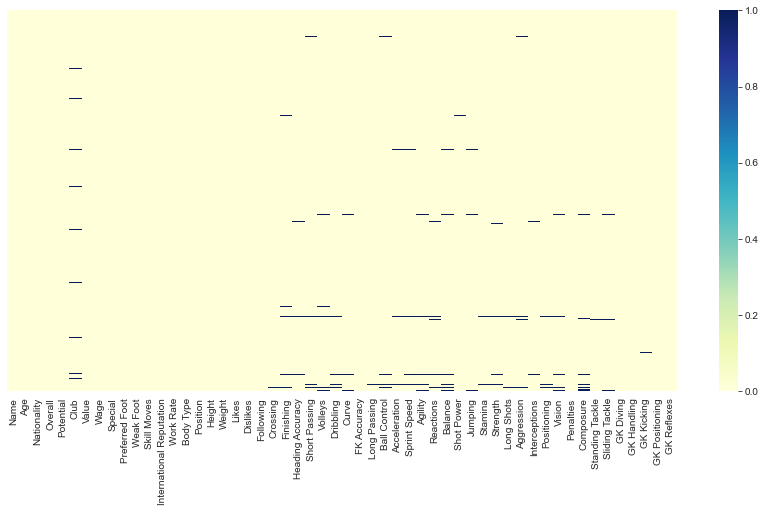

In [19]:

plt.figure(figsize =(15, 7))
sns.heatmap(df_.isna(), yticklabels = False, cmap = 'YlGnBu');

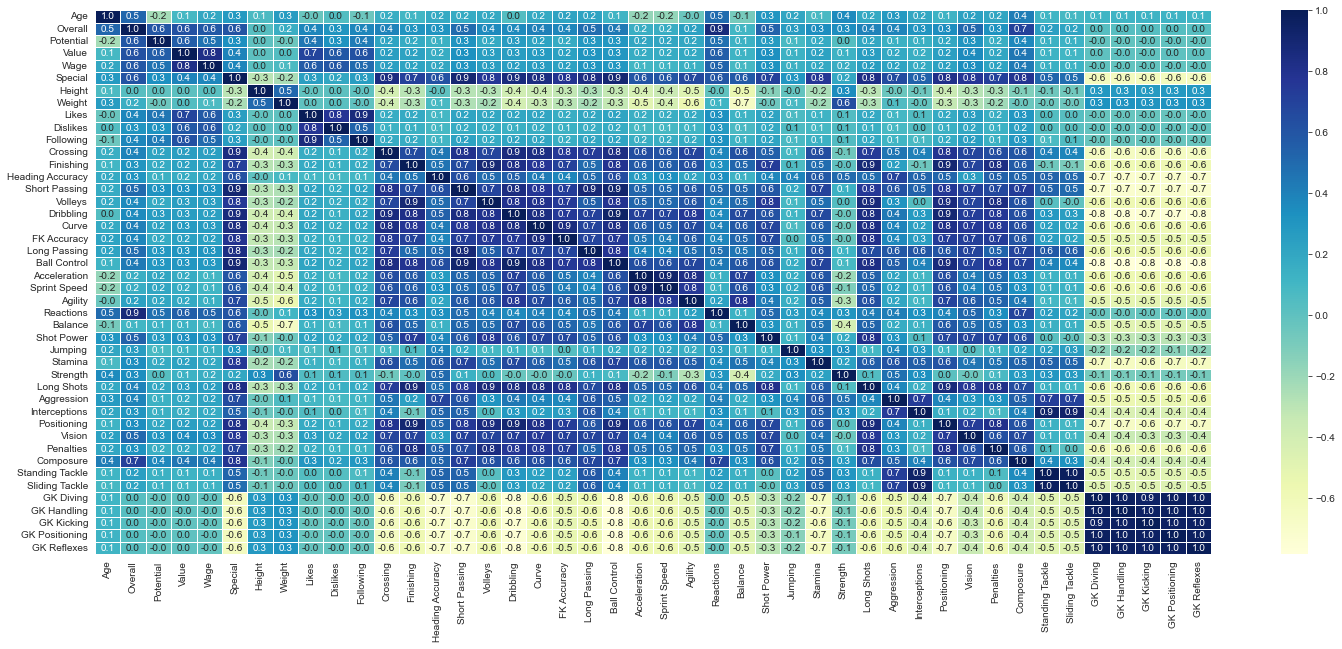

In [20]:
corr_ = df_[df_num_fe.columns].corr()
f,ax = plt.subplots(figsize = (25, 10))
sns.heatmap(corr_,annot = True, linewidths = 0.5, cmap = "YlGnBu", fmt = '.1f', ax = ax)
plt.show()

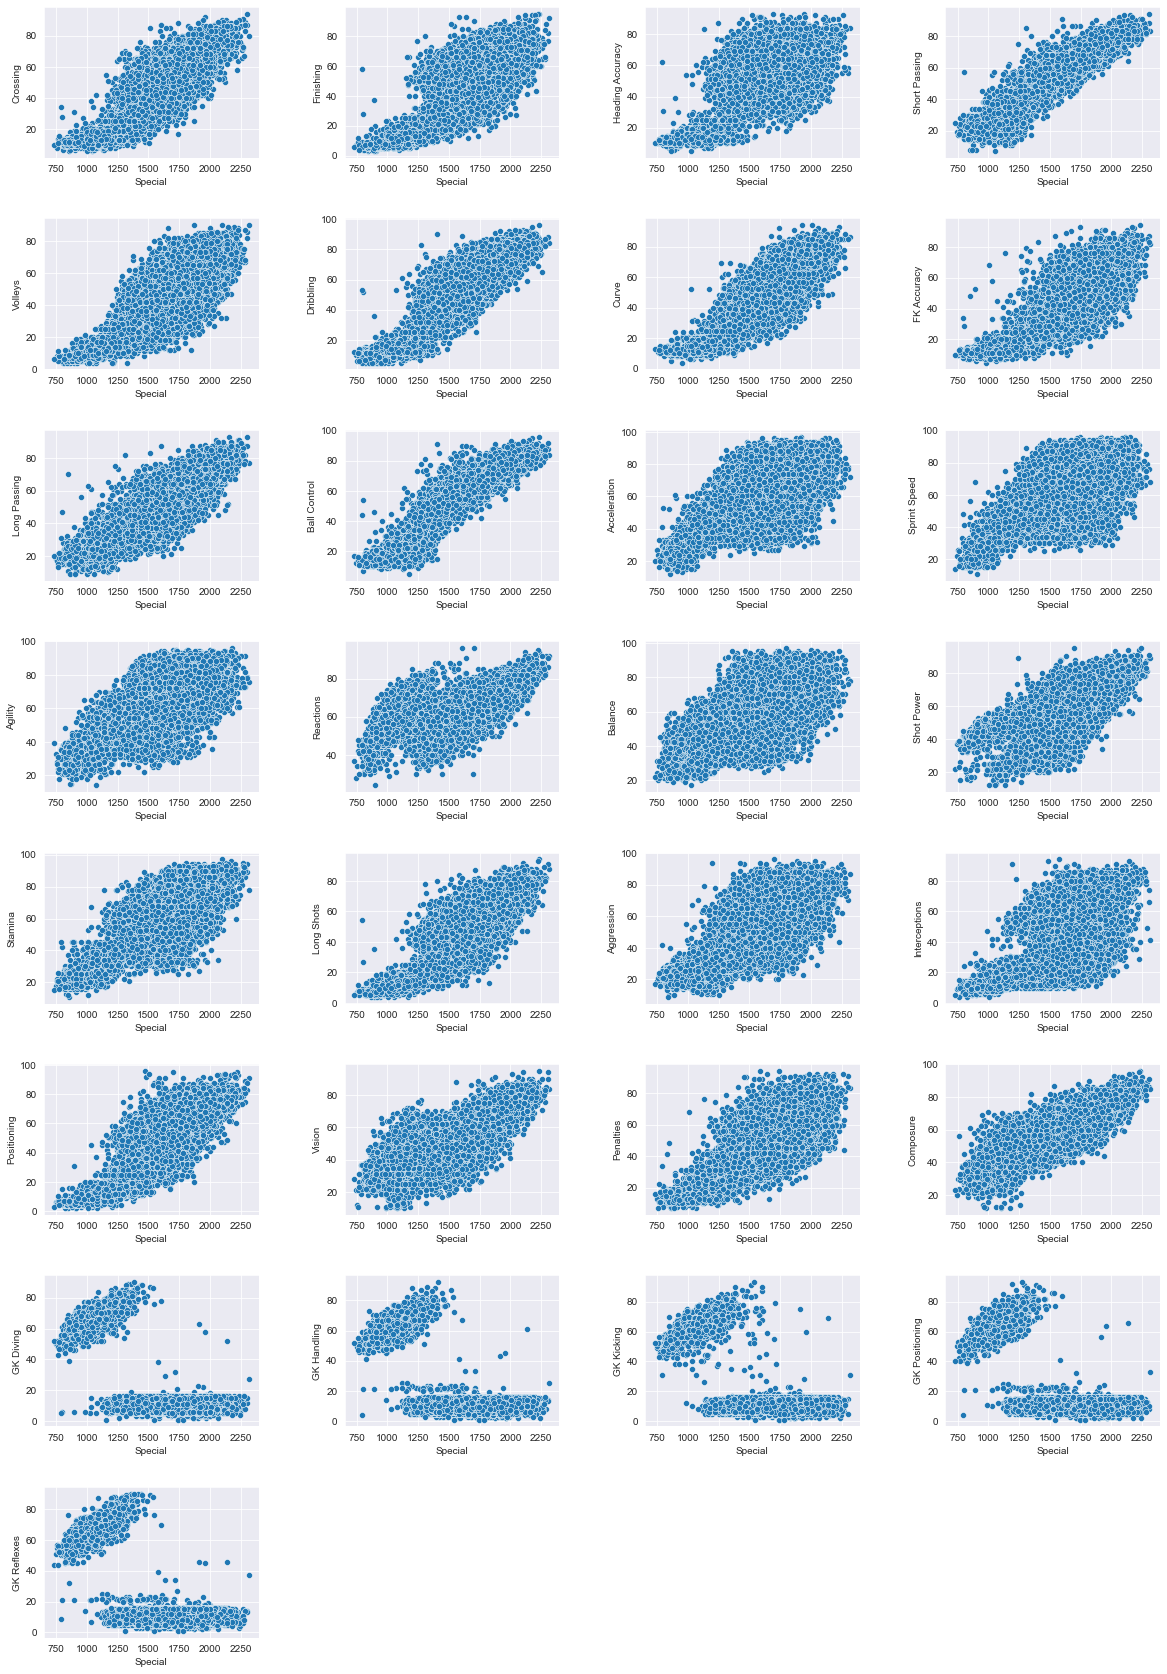

In [21]:
columns =  ['Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing','Volleys', 'Dribbling', 'Curve', 'FK Accuracy', 
            'Long Passing','Ball Control', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions','Balance', 'Shot Power',
            'Stamina','Long Shots','Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties','Composure', 
            'GK Diving','GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']

fig = plt.figure(figsize = (20, 30))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
count = 1

for column in columns:
    ax = fig.add_subplot(len(columns)//4+1, 4, count)
    sns.scatterplot(x = df['Special'], y = df[column])
    count +=1

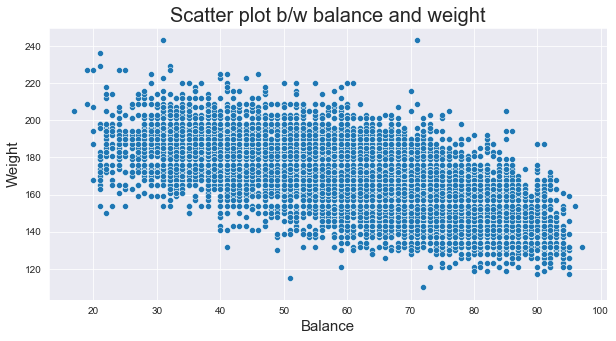

In [22]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'Balance', y = 'Weight', data = df_);
plt.ylabel('Weight', fontsize = 15)
plt.xlabel('Balance', fontsize = 15)
plt.title('Scatter plot b/w balance and weight', fontsize = 20);

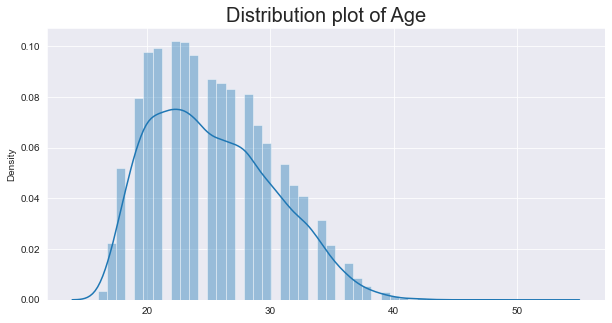

In [23]:
fig = plt.figure(figsize = (10, 5))
sns.distplot(x = df['Age'])
plt.title('Distribution plot of Age', fontsize = 20);

In [24]:
df_train = df[['Special'] + columns[:-5]].dropna()
df_test = df[df[['Special'] + columns[:-5]].isnull().any(axis = 1)]

In [25]:
df_train.head()

,Special,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Stamina,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure
0,1729,67.0,60.0,50.0,67.0,56.0,74.0,59.0,62.0,58.0,70.0,84.0,84.0,83.0,65.0,76.0,68.0,75.0,61.0,42.0,31.0,65.0,63.0,66.0,61.0
1,2144,68.0,87.0,89.0,75.0,88.0,75.0,75.0,76.0,52.0,79.0,74.0,76.0,74.0,88.0,59.0,88.0,90.0,77.0,84.0,54.0,92.0,75.0,85.0,80.0
2,1671,54.0,59.0,42.0,73.0,59.0,77.0,74.0,64.0,50.0,75.0,78.0,76.0,84.0,61.0,80.0,62.0,53.0,58.0,43.0,31.0,56.0,65.0,50.0,59.0
3,2071,76.0,72.0,45.0,74.0,72.0,84.0,81.0,72.0,66.0,80.0,91.0,91.0,86.0,82.0,79.0,80.0,83.0,74.0,74.0,55.0,81.0,75.0,73.0,79.0
4,2099,90.0,84.0,62.0,83.0,90.0,86.0,89.0,86.0,81.0,90.0,55.0,52.0,78.0,84.0,76.0,86.0,65.0,92.0,60.0,55.0,80.0,83.0,81.0,87.0


In [26]:
df_test.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,Weak Foot,Skill Moves,International Reputation,Work Rate,Body Type,Real Face,Release Clause,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Likes,Dislikes,Following,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defensive Awareness,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
13,13,245367,Xavi Simons,17,https://cdn.sofifa.com/players/245/367/20_60.png,Netherlands,https://cdn.sofifa.com/flags/nl.png,65,85,Paris Saint-Germain,https://cdn.sofifa.com/teams/73/light_30.png,1100000.0,2000.0,1656,Right,3 ★,3 ★,1 ★,Medium/ Medium,Lean (170-),No,3100000.0,CM,38.0,"Jul 23, 2019",2022,5'5,150lbs,59+2,59+2,59+2,62+0,64+0,64+0,64+0,62+0,65+2,65+2,65+2,62+2,65+2,65+2,65+2,62+2,58+2,61+2,61+2,61+2,58+2,57+2,55+2,55+2,55+2,57+2,16+2,16,7,70,36.0,53.0,40.0,67.0,33.0,68.0,60.0,45.0,65.0,67.0,60.0,63.0,74.0,68.0,83.0,59.0,58.0,60.0,47.0,55.0,59.0,64.0,67.0,67.0,43.0,NaN,36.0,64.0,52.0,9.0,11.0,5.0,8.0,10.0
28,28,233848,Jens Petter Hauge,20,https://cdn.sofifa.com/players/233/848/20_60.png,Norway,https://cdn.sofifa.com/flags/no.png,73,82,FK Bodø/Glimt,https://cdn.sofifa.com/teams/918/light_30.png,6000000.0,4000.0,1842,Right,3 ★,4 ★,1 ★,High/ Medium,Normal (170-185),No,8700000.0,LW,11.0,"Apr 12, 2016",2021,6'0,165lbs,69+2,69+2,69+2,73+0,72+0,72+0,72+0,73+0,72+2,72+2,72+2,73+2,68+2,68+2,68+2,73+2,62+2,57+2,57+2,57+2,62+2,59+2,50+2,50+2,50+2,59+2,15+2,34,1,118,NaN,NaN,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,80.0,NaN,72.0,NaN,56.0,NaN,67.0,NaN,45.0,39.0,NaN,NaN,65.0,NaN,43.0,NaN,NaN,9.0,7.0,14.0,9.0,8.0
138,138,252145,Nuno Alexandre Tavares Mendes,18,https://cdn.sofifa.com/players/252/145/20_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,72,87,Sporting CP,https://cdn.sofifa.com/teams/237/light_30.png,6000000.0,3000.0,1762,Left,2 ★,2 ★,1 ★,Medium/ Medium,Normal (170-185),No,15800000.0,LWB,35.0,"Jul 1, 2019",2025,5'9,154lbs,58+2,58+2,58+2,65+0,62+0,62+0,62+0,65+0,63+2,63+2,63+2,66+2,62+2,62+2,62+2,66+2,70+2,66+2,66+2,66+2,70+2,71+2,66+2,66+2,66+2,71+2,17+2,5,0,41,NaN,37.0,NaN,64.0,40.0,64.0,40.0,41.0,54.0,NaN,87.0,86.0,82.0,NaN,76.0,40.0,65.0,73.0,48.0,38.0,66.0,NaN,60.0,56.0,45.0,53.0,NaN,68.0,67.0,7.0,8.0,8.0,12.0,15.0
173,173,252042,João Pedro Junqueira de Jesus,18,https://cdn.sofifa.com/players/252/042/20_60.png,Brazil,https://cdn.sofifa.com/flags/br.png,69,84,Watford,https://cdn.sofifa.com/teams/1795/light_30.png,2200000.0,4000.0,1629,Right,4 ★,3 ★,1 ★,Medium/ High,Lean (170-185),Yes,5300000.0,LS,10.0,"Jan 1, 2020",2025,6'0,154lbs,69+2,69+2,69+2,69+0,70+0,70+0,70+0,69+0,68+2,68+2,68+2,68+2,60+2,60+2,60+2,68+2,48+2,43+2,43+2,43+2,48+2,45+2,37+2,37+2,37+2,45+2,16+2,69,9,271,56.0,68.0,70.0,62.0,63.0,73.0,59.0,33.0,54.0,NaN,82.0,76.0,80.0,70.0,60.0,68.0,53.0,70.0,62.0,57.0,29.0,14.0,73.0,63.0,69.0,70.0,17.0,19.0,14.0,7.0,6.0,10.0,8.0,14.0
188,188,248695,Wesley Fofana,19,https://cdn.sofifa.com/players/248/695/20_60.png,France,https://cdn.sofifa.com/flags/fr.png,71,83,AS Saint-Étienne,https://cdn.sofifa.com/teams/1819/light_30.png,3800000.0,9000.0,1631,Right,2 ★,2 ★,1 ★,Medium/ Medium,Lean (185+),No,8400000.0,RCB,3.0,"May 5, 2019",2024,6'3,168lbs,52+2,52+2,52+2,53+0,53+0,53+0,53+0,53+0,55+2,55+2,55+2,56+2,58+2,58+2,58+2,56+2,64+2,66+2,66+2,66+2,64+2,66+2,71+2,71+2,71+2,66+2,17+2,14,2,73,39.0,29.0,NaN,65.0,33.0,59.0,32.0,33.0,59.0,63.0,67.0,69.0,58.0,NaN,55.0,45.0,74.0,65.0,72.0,37.0,NaN,NaN,38.0,45.0,48.0,60.0,NaN,NaN,NaN,14.0,12.0,9.0,14.0,6.0


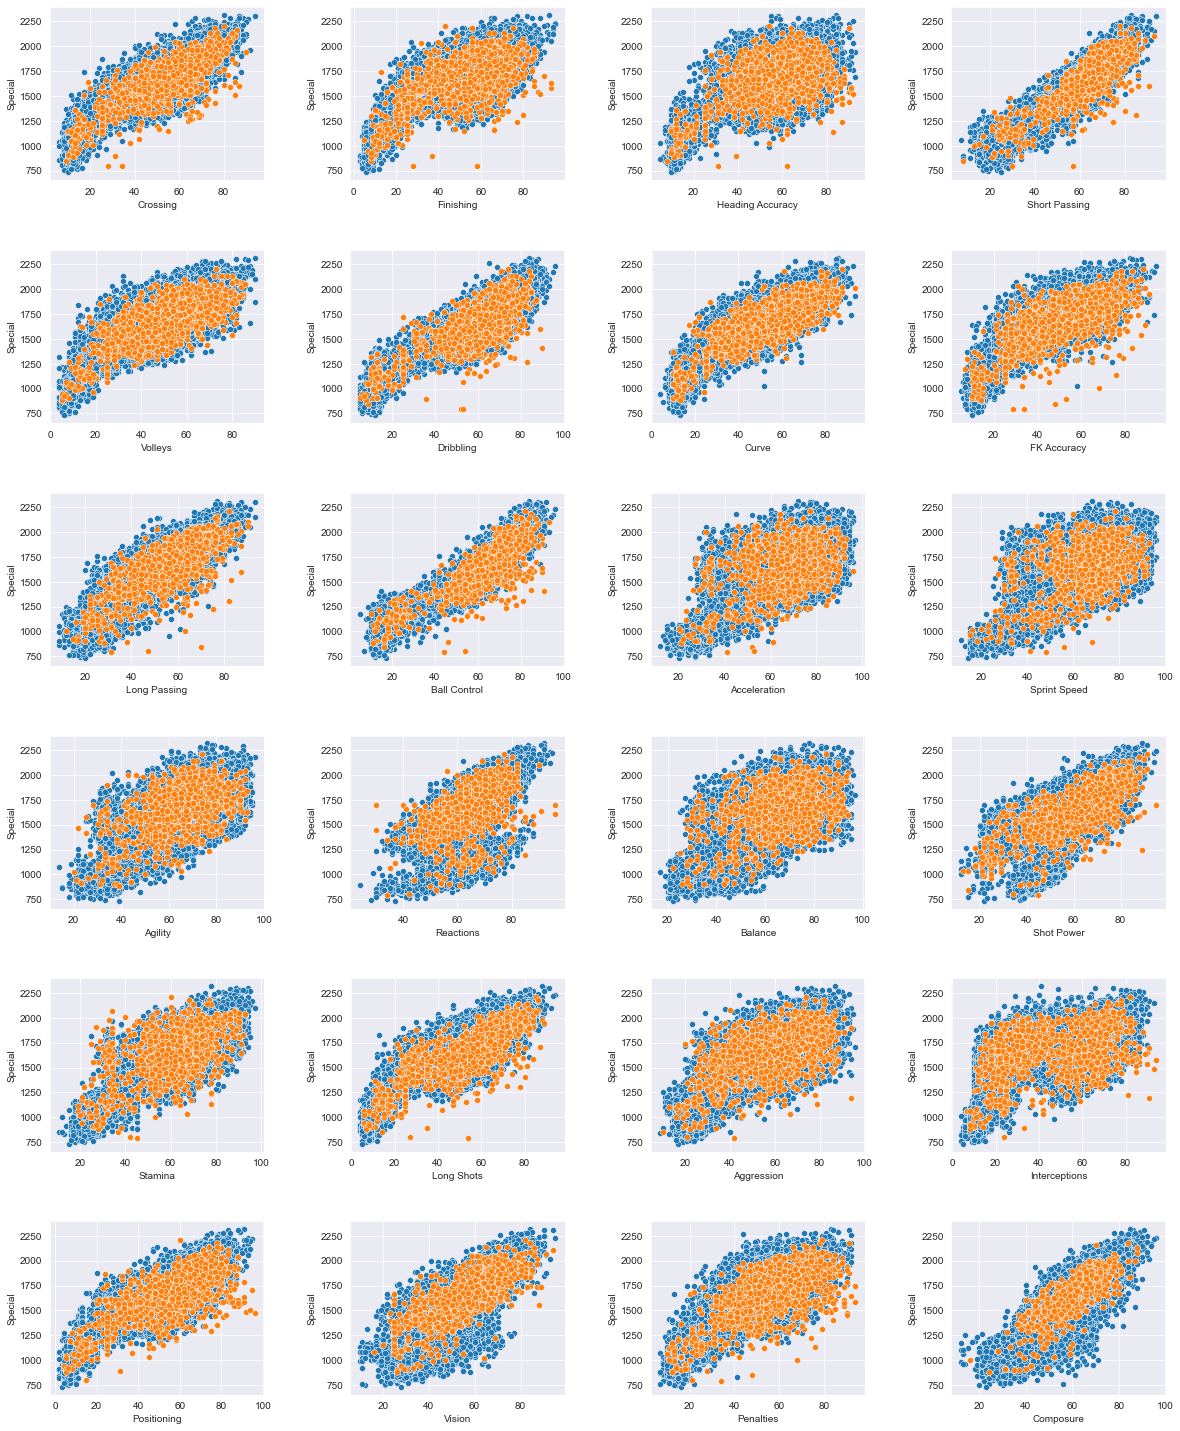

In [27]:
fig = plt.figure(figsize = (20, 30))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
count = 1
for f in columns[:-5]:
    ax = fig.add_subplot(len(columns[:-5])//4+1, 4, count)
    sns.scatterplot(x = df_train[f], y = df_train['Special'])
    sns.scatterplot(x = df_test[f], y = df_test['Special'], palette = "deep");
    count += 1

In [28]:
df_train = df[['Special'] + columns[-5:]].dropna()
df_test = df[df[columns[-5:]].isnull().any(axis = 1)][['Special'] + columns[-5:]]

In [29]:
imputer = KNNImputer(n_neighbors = 1)
imputer.fit(df_train)
df_pred = pd.DataFrame(np.round(imputer.transform(df_test)), columns = df_test.columns, index = df_test.index)

In [30]:
for col in df_test.columns[1:]:
    df_[col].fillna(df_pred[col], inplace = True)

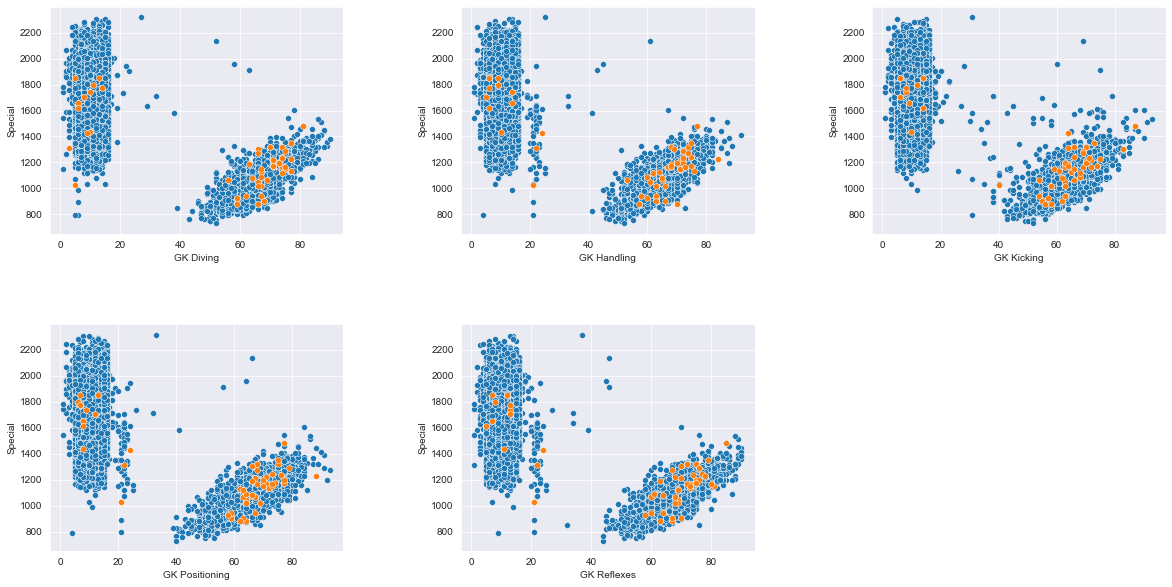

In [31]:
fig = plt.figure(figsize = (20, 10))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
count = 1
for f in columns[-5:]:
    ax = fig.add_subplot(2, 3, count)
    sns.scatterplot(x = df_train[f], y = df_train['Special'])
    sns.scatterplot(x = df_pred[f], y = df_pred['Special'])
    count +=1

In [32]:
df_train = df[['Weight', 'Balance']].dropna()
df_test = df[df['Balance'].isna()][['Weight', 'Balance']]

In [33]:
df_train.head()

,Weight,Balance
0,143lbs,76.0
1,170lbs,59.0
2,174lbs,80.0
3,150lbs,79.0
4,165lbs,76.0


In [34]:
def type_conv(x):
    return int(x[:3])

df_train['Weight'] = df_train['Weight'].map(type_conv)
df_test['Weight'] = df_test['Weight'].map(type_conv)

In [35]:
df_train.head()

,Weight,Balance
0,143,76.0
1,170,59.0
2,174,80.0
3,150,79.0
4,165,76.0


In [43]:

model = make_pipeline(PolynomialFeatures(1)
                      , LinearRegression())
model.fit(X = df_train['Balance'], y = df_train['Weight'])


df_test['Balance'] = np.round(polyreg.predict(df_test[['Weight']]))   #.reshape(-1,1)
df_test

ValueError: Expected 2D array, got 1D array instead:
array=[76. 59. 80. ... 83. 56. 42.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:

df_['Weight'].fillna(df_test['Weight'], inplace = True)

In [ ]:
plt.figure(figsize = (10, 5))
sns.scatterplot(df_train['Weight'], df_train['Balance'])
sns.scatterplot(df_test['Weight'], df_test['Balance']);
plt.xlabel('Weight', fontsize = 15);
plt.ylabel('Balance', fontsize = 15);